In [3]:
import networkx as nx
from matplotlib import pyplot as plt
from bresenham import bresenham
import numpy as np

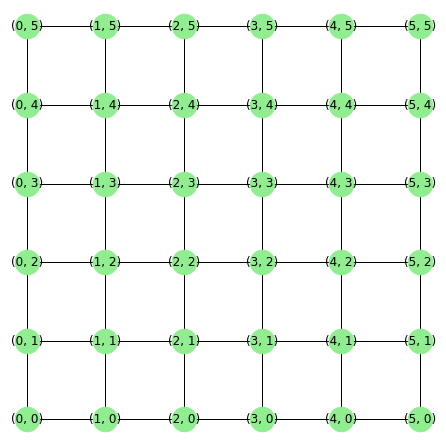

In [121]:
G = nx.grid_2d_graph(6,6)

plt.figure(figsize=(6,6))
pos = {(x,y):(x,y) for x,y in G.nodes()}
nx.draw(G, pos=pos, 
        node_color='lightgreen', 
        with_labels=True,
        node_size=600)

In [4]:
#node_rem = [(0,0),(0,2),(2,2),(2,1)]
a = (1,1)
b = (4,5)
a1, a2 = a[0], a[1]
b1, b2 = b[0], b[1]
node_rem = list(bresenham(a1, a2, b1, b2))

In [147]:
G.nodes()

NodeView(((0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)))

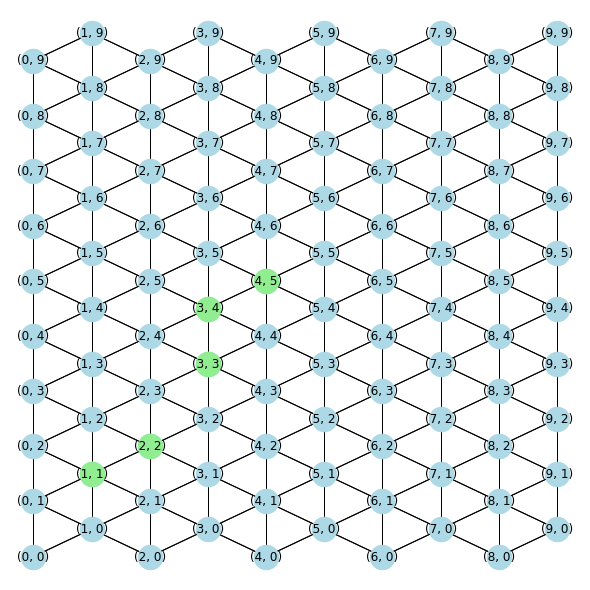

In [5]:
sats = [10,10]
G = nx.grid_2d_graph(sats[0],sats[1])

#pos = {(x,y):(x,y) for x,y in G.nodes()}
#i=0
pos = {}
for x,y in G.nodes():
    y1 = y
    if x%2 != 0:
        y1 = y+0.5
    pos[(x,y)]=tuple((x,y1))
#pos

plt.figure(figsize=(8,8))

G.add_edges_from([
    ((x, y), (x+1, y+1))
    for x in range(sats[0]-1)
    for y in range(sats[1]-1)
if x % 2 != 0] + [
    ((x+1, y), (x, y+1))
    for x in range(sats[0]-1)
    for y in range(sats[1]-1)
if x % 2 == 0], weight=1)

#nx.draw_networkx_edges(G1, pos=pos1, edgelist = node_rem, width = 3, alpha = 1)
#G.add_edge(a,b, edge_color='b',width = 6)
nx.draw(G, pos=pos, node_color="lightblue", node_size=600)
nx.draw(G, pos=pos, nodelist=node_rem, node_color="lightgreen", with_labels=True, node_size=600)
#G1.remove_nodes_from(node_rem)

plt.show()

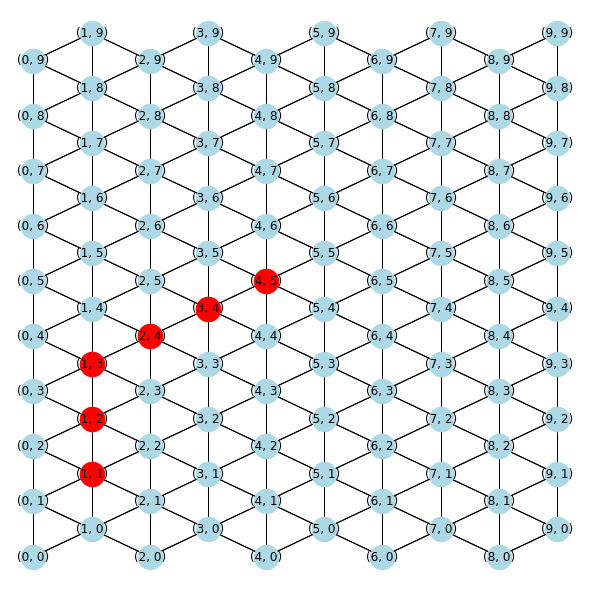

In [6]:
dijs = nx.dijkstra_path(G, (1,1), (4,5))
plt.figure(figsize=(8,8))
nx.draw(G, pos=pos, node_color="lightblue", node_size=600)
nx.draw(G, pos=pos, nodelist=dijs, node_color="red", with_labels=True, node_size=600)
plt.show()

In [9]:
#link_type = 0 - permanent links || 1 - critical links
# Gaussian noise = np.random.normal(mean,sd)
# Poisson distributed noise = np.random.poisson(lambda)
# Exponential distributed noise = np.random.exponential(1/lambda)

class ISL:
    def __init__(self, link_type):
        self.link_type = link_type
        if self.link_type == 0:
            self.throughput = 100 - np.random.poisson(5)
            self.delay = 50 + np.random.poisson(5)
            self.congestion = 0
        elif self.link_type == 1:
            self.throughput = 100 - np.random.poisson(10)
            self.delay = 70 + np.random.poisson(7)
            self.congestion = 0
    def getScore(self):
        self.score = self.throughput/100 + 50/self.delay - self.congestion/100
        return self.score
    
    def getCost(self):
        self.cost = 2/self.getScore()
        return self.cost
    
    def setCost(self, weight):
        self.cost = weight
    
#     def updateCongestion(self, value, weight = self.getCost()):
#         self.congestion += value
        

In [112]:
links = []
# for i in range(100):
#     links.append(ISL(0))
#     print(links[i].getScore())
link = ISL(1)
print(link.getCost())

1.2612919720470428


In [10]:
for p in range(sats[0]-1):
    for q in range(sats[1]-1):
        if p % 2 != 0:
            link = ISL(1)
            G[(p,q)][(p+1,q+1)]['weight'] = link.getCost()
            print(G.get_edge_data((p,q),(p+1,q+1)))

for p in range(sats[0]-1):
    for q in range(sats[1]-1):
        if p % 2 == 0:
            link = ISL(1)
            G[(p+1,q)][(p,q+1)]['weight'] = link.getCost()
            print(G.get_edge_data((p+1,q),(p,q+1)))
            
for p in range(sats[0]-1):
    for q in range(sats[1]-1):
            link = ISL(1)
            G[(p,q)][(p+1,q)]['weight'] = link.getCost()
            print(G.get_edge_data((p,q),(p+1,q)))

for p in range(sats[0]):
    for q in range(sats[1]-1):
        link = ISL(0)
        G[(p,q)][(p,q+1)]['weight'] = link.getCost()
        print(G.get_edge_data((p,q),(p,q+1)))

{'weight': 1.278409090909091}
{'weight': 1.2595293337752733}
{'weight': 1.2939325056828117}
{'weight': 1.2634946021591364}
{'weight': 1.3029315960912051}
{'weight': 1.3352073085031624}
{'weight': 1.273053696752081}
{'weight': 1.2526096033402923}
{'weight': 1.3201320132013201}
{'weight': 1.2663432283529314}
{'weight': 1.313274042058017}
{'weight': 1.3181448331977217}
{'weight': 1.251646903820817}
{'weight': 1.3268899991809322}
{'weight': 1.281208935611038}
{'weight': 1.2371134020618557}
{'weight': 1.3324222753672703}
{'weight': 1.2879034887512226}
{'weight': 1.244813278008299}
{'weight': 1.3468013468013469}
{'weight': 1.3089906992766103}
{'weight': 1.3063138502763356}
{'weight': 1.2612919720470428}
{'weight': 1.3578549329666552}
{'weight': 1.3114754098360657}
{'weight': 1.2908633696563288}
{'weight': 1.2227362855254462}
{'weight': 1.346188830271057}
{'weight': 1.2908633696563288}
{'weight': 1.2684989429175475}
{'weight': 1.2862302880803453}
{'weight': 1.2825851586574497}
{'weight': 1.23

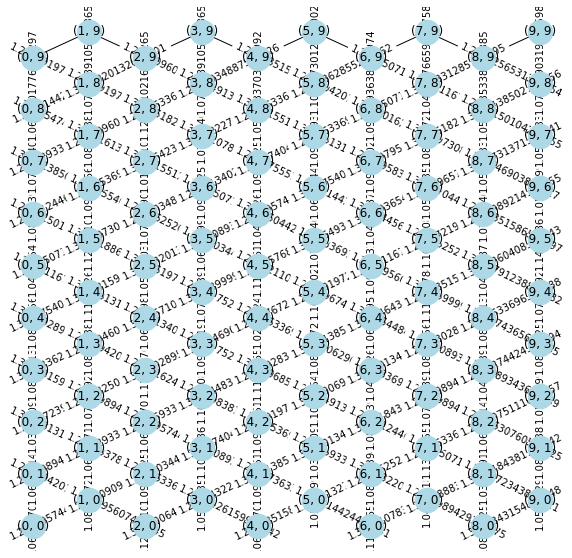

In [11]:
pos = {}
for x,y in G.nodes():
    y1 = y
    if x%2 != 0:
        y1 = y+0.5
    pos[(x,y)]=tuple((x,y1))
#pos

plt.figure(figsize=(10,10))
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
nx.draw(G, pos=pos, node_color="lightblue", with_labels=True, node_size=600)
#G1.remove_nodes_from(node_rem)

plt.show()



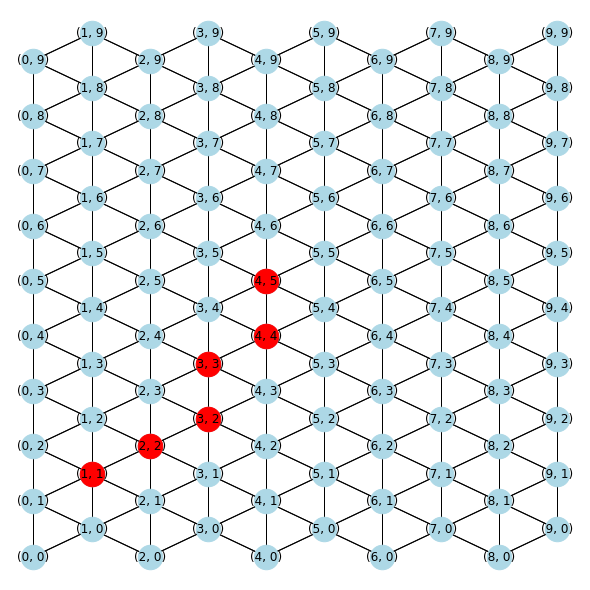

In [12]:
dijs = nx.dijkstra_path(G, (1,1), (4,5))
plt.figure(figsize=(8,8))
nx.draw(G, pos=pos, node_color="lightblue", node_size=600)
nx.draw(G, pos=pos, nodelist=dijs, node_color="red", with_labels=True, node_size=600)
plt.show()


In [13]:
# final cost computation for unscored dijkstra
weight_unscored = [0]*100

for j in range(100):
    print(j)
    for i in range(len(dijs)-1): 
        print(G.get_edge_data(dijs[i],dijs[i+1]))
        w = G.get_edge_data(dijs[i],dijs[i+1])['weight']
        G[dijs[i]][dijs[i+1]]['weight'] = w + 1/100
        weight_unscored[j] += w + 1/100
        print('Path' + str(dijs[i]) + ' to ' + str(dijs[i+1]) + ': ' + str(G.get_edge_data(dijs[i],dijs[i+1])))
        print(' ')
      

0
{'weight': 1.2595293337752733}
Path(1, 1) to (2, 2): {'weight': 1.2695293337752733}
 
{'weight': 1.2894693337741774}
Path(2, 2) to (3, 2): {'weight': 1.2994693337741774}
 
{'weight': 1.103230890464933}
Path(3, 2) to (3, 3): {'weight': 1.113230890464933}
 
{'weight': 1.251646903820817}
Path(3, 3) to (4, 4): {'weight': 1.261646903820817}
 
{'weight': 1.0248324793062673}
Path(4, 4) to (4, 5): {'weight': 1.0348324793062673}
 
1
{'weight': 1.2695293337752733}
Path(1, 1) to (2, 2): {'weight': 1.2795293337752733}
 
{'weight': 1.2994693337741774}
Path(2, 2) to (3, 2): {'weight': 1.3094693337741774}
 
{'weight': 1.113230890464933}
Path(3, 2) to (3, 3): {'weight': 1.123230890464933}
 
{'weight': 1.261646903820817}
Path(3, 3) to (4, 4): {'weight': 1.271646903820817}
 
{'weight': 1.0348324793062673}
Path(4, 4) to (4, 5): {'weight': 1.0448324793062673}
 
2
{'weight': 1.2795293337752733}
Path(1, 1) to (2, 2): {'weight': 1.2895293337752733}
 
{'weight': 1.3094693337741774}
Path(2, 2) to (3, 2): {'w

In [14]:
for p in range(sats[0]-1):
    for q in range(sats[1]-1):
        if p % 2 != 0:
            link = ISL(1)
            G[(p,q)][(p+1,q+1)]['weight'] = link.getCost()
            print(G.get_edge_data((p,q),(p+1,q+1)))

for p in range(sats[0]-1):
    for q in range(sats[1]-1):
        if p % 2 == 0:
            link = ISL(1)
            G[(p+1,q)][(p,q+1)]['weight'] = link.getCost()
            print(G.get_edge_data((p+1,q),(p,q+1)))
            
for p in range(sats[0]-1):
    for q in range(sats[1]-1):
            link = ISL(1)
            G[(p,q)][(p+1,q)]['weight'] = link.getCost()
            print(G.get_edge_data((p,q),(p+1,q)))

for p in range(sats[0]):
    for q in range(sats[1]-1):
        link = ISL(0)
        G[(p,q)][(p,q+1)]['weight'] = link.getCost()
        print(G.get_edge_data((p,q),(p,q+1)))

{'weight': 1.2992491352400235}
{'weight': 1.3219544846050868}
{'weight': 1.2618841832324978}
{'weight': 1.3425016371971186}
{'weight': 1.2894693337741774}
{'weight': 1.2992491352400235}
{'weight': 1.2583755515607127}
{'weight': 1.326352530541012}
{'weight': 1.3377926421404682}
{'weight': 1.281208935611038}
{'weight': 1.2861736334405143}
{'weight': 1.3377926421404682}
{'weight': 1.3077445652173914}
{'weight': 1.3100436681222707}
{'weight': 1.3396642360522297}
{'weight': 1.2883197516492044}
{'weight': 1.3268899991809322}
{'weight': 1.273053696752081}
{'weight': 1.2837837837837838}
{'weight': 1.2908633696563288}
{'weight': 1.313274042058017}
{'weight': 1.3377926421404682}
{'weight': 1.3029315960912051}
{'weight': 1.3163518249423027}
{'weight': 1.2692967409948541}
{'weight': 1.2755958375293721}
{'weight': 1.3396642360522297}
{'weight': 1.2692967409948541}
{'weight': 1.2618296529968454}
{'weight': 1.3413585554600171}
{'weight': 1.29783693843594}
{'weight': 1.2992491352400235}
{'weight': 1.2

In [15]:
# cost computation for scored dijkstra
weight_scored = [0]*100

for j in range(100):
    print(j)
    dijs = nx.dijkstra_path(G, (1,1), (4,5))
    for i in range(len(dijs)-1): 
        print(G.get_edge_data(dijs[i],dijs[i+1]))
        w = G.get_edge_data(dijs[i],dijs[i+1])['weight']
        G[dijs[i]][dijs[i+1]]['weight'] = w + 1/100
        weight_scored[j] += w + 1/100
        print('Path' + str(dijs[i]) + ' to ' + str(dijs[i+1]) + ': ' + str(G.get_edge_data(dijs[i],dijs[i+1])))
        print(' ')


0
{'weight': 1.0852713178294573}
Path(1, 1) to (1, 2): {'weight': 1.0952713178294573}
 
{'weight': 1.2618841832324978}
Path(1, 2) to (2, 3): {'weight': 1.2718841832324979}
 
{'weight': 1.0776292157254042}
Path(2, 3) to (2, 4): {'weight': 1.0876292157254042}
 
{'weight': 1.2232928361960622}
Path(2, 4) to (3, 4): {'weight': 1.2332928361960622}
 
{'weight': 1.3100436681222707}
Path(3, 4) to (4, 5): {'weight': 1.3200436681222707}
 
1
{'weight': 1.0952713178294573}
Path(1, 1) to (1, 2): {'weight': 1.1052713178294573}
 
{'weight': 1.2718841832324979}
Path(1, 2) to (2, 3): {'weight': 1.2818841832324979}
 
{'weight': 1.0876292157254042}
Path(2, 3) to (2, 4): {'weight': 1.0976292157254042}
 
{'weight': 1.2332928361960622}
Path(2, 4) to (3, 4): {'weight': 1.2432928361960622}
 
{'weight': 1.3200436681222707}
Path(3, 4) to (4, 5): {'weight': 1.3300436681222707}
 
2
{'weight': 1.1052713178294573}
Path(1, 1) to (1, 2): {'weight': 1.1152713178294573}
 
{'weight': 1.2818841832324979}
Path(1, 2) to (2,

Path(1, 2) to (2, 3): {'weight': 1.501884183232498}
 
{'weight': 1.532077524651479}
Path(2, 3) to (3, 3): {'weight': 1.542077524651479}
 
{'weight': 1.1973403822692152}
Path(3, 3) to (3, 4): {'weight': 1.2073403822692153}
 
{'weight': 1.740043668122271}
Path(3, 4) to (4, 5): {'weight': 1.750043668122271}
 
81
{'weight': 1.7419544846050872}
Path(1, 1) to (2, 2): {'weight': 1.7519544846050872}
 
{'weight': 1.2200389105058367}
Path(2, 2) to (2, 3): {'weight': 1.2300389105058367}
 
{'weight': 1.2176292157254043}
Path(2, 3) to (2, 4): {'weight': 1.2276292157254043}
 
{'weight': 1.5132928361960625}
Path(2, 4) to (3, 4): {'weight': 1.5232928361960625}
 
{'weight': 1.750043668122271}
Path(3, 4) to (4, 5): {'weight': 1.760043668122271}
 
82
{'weight': 1.7519544846050872}
Path(1, 1) to (2, 2): {'weight': 1.7619544846050872}
 
{'weight': 1.5678369384359403}
Path(2, 2) to (3, 2): {'weight': 1.5778369384359403}
 
{'weight': 1.19346709470305}
Path(3, 2) to (3, 3): {'weight': 1.20346709470305}
 
{'we

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


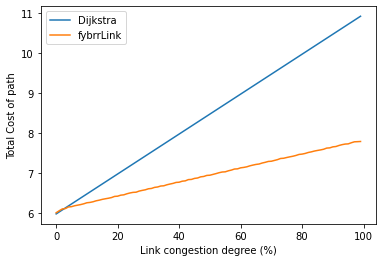

In [17]:
x = range(100)
plt.plot(x, weight_unscored, label = "Dijkstra")  

# plotting the line 2 points 
plt.plot(x, weight_scored, label = "fybrrLink")
  
# naming the x axis
plt.xlabel('Link congestion degree (%)')
# naming the y axis
plt.ylabel('Total Cost of path')
# giving a title to my graph
#plt.title('Weight path vs number of packet chunks')
  
# show a legend on the plot
plt.legend()
plt.savefig('path_weight.eps', format='eps')
# function to show the plot
plt.show()

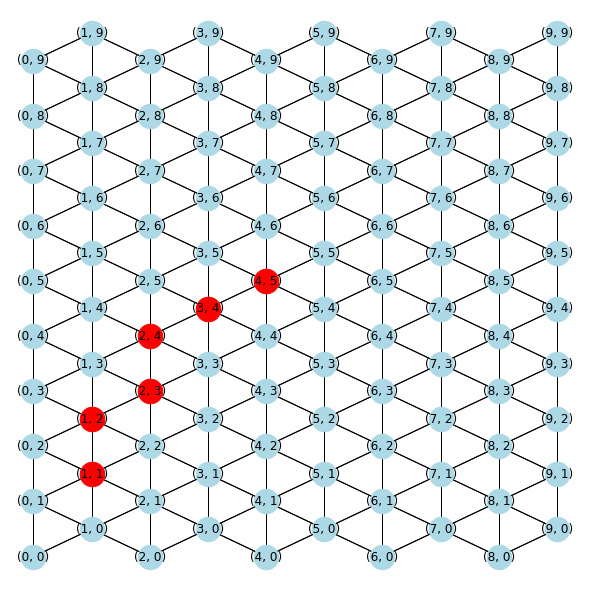

In [173]:
plt.figure(figsize=(8,8))
nx.draw(G, pos=pos, node_color="lightblue", node_size=600)
nx.draw(G, pos=pos, nodelist=dijs, node_color="red", with_labels=True, node_size=600)
plt.show()

In [ ]:
#Experimental cell


import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import matplotlib.animation

# Create Graph
np.random.seed(2)
G = nx.cubical_graph()
G = nx.relabel_nodes(G, {0:"O", 1:"X", 2:"XZ", 3:"Z", 4:"Y", 5:"YZ", 6: "XYZ", 7:"XY"})
pos = nx.spring_layout(G)

# Sequence of letters
sequence_of_letters = "".join(['X', 'Y', 'Z', 'Y', 'Y', 'Z'])
idx_colors = sns.cubehelix_palette(5, start=.5, rot=-.75)[::-1]
idx_weights = [3,2,1]

# Build plot
fig, ax = plt.subplots(figsize=(6,4))


def update(num):
    ax.clear()
    i = num // 3
    j = num % 3 + 1
    triad = sequence_of_letters[i:i+3]
    path = ["O"] + ["".join(sorted(set(triad[:k + 1]))) for k in range(j)]

    # Background nodes
    nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color="gray")
    null_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=set(G.nodes()) - set(path), node_color="white",  ax=ax)
    null_nodes.set_edgecolor("black")

    # Query nodes
    query_nodes = nx.draw_networkx_nodes(G, pos=pos, nodelist=path, node_color=idx_colors[:len(path)], ax=ax)
    query_nodes.set_edgecolor("white")
    nx.draw_networkx_labels(G, pos=pos, labels=dict(zip(path,path)),  font_color="white", ax=ax)
    edgelist = [path[k:k+2] for k in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos=pos, edgelist=edgelist, width=idx_weights[:len(path)], ax=ax)

    # Scale plot ax
    ax.set_title("Frame %d:    "%(num+1) +  " - ".join(path), fontweight="bold")
    ax.set_xticks([])
    ax.set_yticks([])


ani = matplotlib.animation.FuncAnimation(fig, update, frames=6, interval=1000, repeat=True)
plt.show()

In [131]:
G.get_edge_data((p,q),(p,q+1))

(1, 1)
(1, 2)
 
(1, 2)
(2, 3)
 
(2, 3)
(3, 3)
 
(3, 3)
(3, 4)
 
(3, 4)
(4, 5)
 


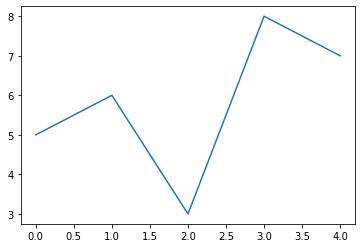

In [176]:
x = range(5)
y = [5,6,3,8,7]
plt.plot(x, y)
